In [260]:
import os
import geopandas as gpd
import pandas as pd
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import json

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

from itertools import islice

from sklearn.cluster import SpectralClustering
from sklearn import preprocessing

import time

import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, datasets

In [261]:
directory = 'analysis/histograms'
if not os.path.exists(directory):
    os.makedirs(directory)

In [262]:
# import merged puma pums data
df_pp = pd.read_pickle('data/puma_pums/merged2.pickle')
gdf_pp = gpd.GeoDataFrame(df_pp)
gdf_pp.head(3)

,DIVISION,PUMA,REGION,ST,WGTP,ADJINC,ADJHSG,HINCP,FINCP,NP,...,puma,y_wt,state_puma,inc_percap,w_percap,geometry,owner,system,price,w_use_percap
0,7,3602,3,48,90,1008425,1000000,52000.0,52000.0,3,...,3602,0.069231,48-3602,17333.333333,13.333333,"POLYGON ((-96.60183099999998 30.64192599999999, -96.59990599999998 30.64390499999999, -96.59661599999997 30.64628099999999, -96.59522199999998 30.64905399999999, -96.59549599999997 30.650283999999...",Public,COLLEGE STATION,0.004298,3102.218086
1,7,3602,3,48,290,1008425,1000000,41100.0,0.0,3,...,3602,6.350365,48-3602,13700.000000,300.000000,"POLYGON ((-96.60183099999998 30.64192599999999, -96.59990599999998 30.64390499999999, -96.59661599999997 30.64628099999999, -96.59522199999998 30.64905399999999, -96.59549599999997 30.650283999999...",Public,COLLEGE STATION,0.004298,69799.906933
2,7,3602,3,48,124,1008425,1000000,61000.0,61000.0,4,...,3602,0.609836,48-3602,15250.000000,75.000000,"POLYGON ((-96.60183099999998 30.64192599999999, -96.59990599999998 30.64390499999999, -96.59661599999997 30.64628099999999, -96.59522199999998 30.64905399999999, -96.59549599999997 30.650283999999...",Public,COLLEGE STATION,0.004298,17449.976733


In [263]:
gdf_pp['geometry']=gdf_pp['geometry'].centroid
gdf_pp.head(3)

,DIVISION,PUMA,REGION,ST,WGTP,ADJINC,ADJHSG,HINCP,FINCP,NP,...,puma,y_wt,state_puma,inc_percap,w_percap,geometry,owner,system,price,w_use_percap
0,7,3602,3,48,90,1008425,1000000,52000.0,52000.0,3,...,3602,0.069231,48-3602,17333.333333,13.333333,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,3102.218086
1,7,3602,3,48,290,1008425,1000000,41100.0,0.0,3,...,3602,6.350365,48-3602,13700.000000,300.000000,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,69799.906933
2,7,3602,3,48,124,1008425,1000000,61000.0,61000.0,4,...,3602,0.609836,48-3602,15250.000000,75.000000,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,17449.976733


In [264]:
def getXY(pt):
    return (pt.x, pt.y)
gdf_pp['troid'] = gdf_pp['geometry'].centroid
gdf_pp['x'], gdf_pp['y'] = [list(t) for t in zip(*map(getXY, gdf_pp['geometry']))]

gdf_pp.head()

,DIVISION,PUMA,REGION,ST,WGTP,ADJINC,ADJHSG,HINCP,FINCP,NP,...,inc_percap,w_percap,geometry,owner,system,price,w_use_percap,troid,x,y
0,7,3602,3,48,90,1008425,1000000,52000.0,52000.0,3,...,17333.333333,13.333333,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,3102.218086,POINT (-96.3023928660625 30.66080409035931),-96.302393,30.660804
1,7,3602,3,48,290,1008425,1000000,41100.0,0.0,3,...,13700.000000,300.000000,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,69799.906933,POINT (-96.3023928660625 30.66080409035931),-96.302393,30.660804
2,7,3602,3,48,124,1008425,1000000,61000.0,61000.0,4,...,15250.000000,75.000000,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,17449.976733,POINT (-96.3023928660625 30.66080409035931),-96.302393,30.660804
3,7,3602,3,48,89,1008425,1000000,125000.0,125000.0,2,...,62500.000000,85.000000,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,19776.640298,POINT (-96.3023928660625 30.66080409035931),-96.302393,30.660804
4,7,3602,3,48,52,1008425,1000000,50000.0,50000.0,2,...,25000.000000,145.000000,POINT (-96.3023928660625 30.66080409035931),Public,COLLEGE STATION,0.004298,33736.621685,POINT (-96.3023928660625 30.66080409035931),-96.302393,30.660804


In [265]:
# WORKFLOW
# select features
# convert to numpy array
# weight the numpy array
# remove the weight column
# normalize array
# run sklearn spectral clustering


In [266]:
# select features
gdf_pp_trunc = gdf_pp[['WGTP', 'total', 'child', 'adult', 'cit', 'employ', 'hi', 'hs', 'l_h', 'a', 'b', 'na','o', 'w', 'inc_percap', 'price', 'w_use_percap', 'x', 'y']]
gdf_pp_trunc.head(3)

,WGTP,total,child,adult,cit,employ,hi,hs,l_h,a,b,na,o,w,inc_percap,price,w_use_percap,x,y
0,90,3.0,0.333333,0.333333,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17333.333333,0.004298,3102.218086,-96.302393,30.660804
1,290,3.0,0.000000,1.000000,1.0,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13700.000000,0.004298,69799.906933,-96.302393,30.660804
2,124,4.0,0.500000,0.500000,1.0,1.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,15250.000000,0.004298,17449.976733,-96.302393,30.660804


In [267]:
# CORRELATION TABLES 
samples = 100000

gdf_pp_trunc_samp = gdf_pp_trunc.sample(n = samples, replace=True, weights=gdf_pp_trunc['WGTP'])
gdf_pp_trunc_samp.head(3)

,WGTP,total,child,adult,cit,employ,hi,hs,l_h,a,b,na,o,w,inc_percap,price,w_use_percap,x,y
31361,32,3.0,0.333333,0.666667,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,17933.333333,0.003678,21750.951604,-81.602248,27.821369
17451,140,2.0,0.000000,0.500000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5800.000000,0.008607,11618.225122,-98.703637,33.987930
77676,62,4.0,0.500000,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,43000.250000,0.008479,12382.805590,-71.662727,43.256232


In [268]:
# generate correlation matrix and format

corr = gdf_pp_trunc_samp.drop('WGTP', axis=1)
corr = corr.corr(min_periods=2)
corr = corr.round(decimals=2)

# set all values in upper-right hand corner to arbitrary value
data_2_idx = corr.index.tolist()
for row in range(corr.shape[0]):
    for col in range(corr.shape[1]):
        if row <= col:
            corr.iloc[row][col] = float('inf')

def bcolor_divergent(val):
    """
    Uses colorbrewer2's divergent color scheme for ten intervals
    """
    if val == float('inf'):
        bcolor = '#FFFFFF'
    elif val < -0.8:
        bcolor = '#8e0152'
    elif val < -0.6:
        bcolor = '#c51b7d'
    elif val < -0.4:
        bcolor = '#de77ae'
    elif val < -0.2:
        bcolor = '#f1b6da'
    elif val < 0.0:
        bcolor = '#fde0ef'
    elif val < 0.2:
        bcolor = '#e6f5d0'
    elif val < 0.4:
        bcolor = '#b8e186'
    elif val < 0.6:
        bcolor = '#7fbc41'
    elif val < 0.6:
        bcolor = '#4d9221'
    else:
        bcolor = '#276419'
    return 'background-color: %s' % bcolor

def font_white(val):
    """
    blank out cells with value of inf
    """
    color =''
    if val == float('inf'):
        color = '#FFFFFF'
    return 'color: %s' % color

pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 200)
styled = corr.style.applymap(bcolor_divergent)
styled2 = styled.applymap(font_white)
styled2.set_properties(**{'border-color':'white'})
#corr.applymap(remove_upper_right)
#new = corr.iloc[:3, 0:3].style.applymap(color_divergent)
#new = corr
#new.iloc[0][0].style.applymap(color_divergent)

In [269]:
# HISTOGRAM OUTPUTS TO HTML / JS
# take samples of 1000
samples2 = 1000
gdf_pp_trunc_samp2 = gdf_pp_trunc.sample(n = samples2, replace=True, weights=gdf_pp_trunc['WGTP'])
gdf_pp_trunc_samp2.shape

gdf_hist = gdf_pp_trunc_samp2.copy()
gdf_hist.drop('WGTP', inplace=True, axis=1)

gdf_hist_list = gdf_hist.columns.values.tolist()
print len(gdf_hist_list)
print gdf_hist_list

18
['total', 'child', 'adult', 'cit', 'employ', 'hi', 'hs', 'l_h', 'a', 'b', 'na', 'o', 'w', 'inc_percap', 'price', 'w_use_percap', 'x', 'y']


In [270]:
np_hist = gdf_hist.as_matrix()
np_hist = (np_hist - np_hist.min(0)) / np_hist.ptp(0)
np_hist = np.round(np_hist, decimals=2)
np.set_printoptions(precision=2, suppress=True)
np_hist_format = np_hist.copy()
np_hist_format.shape

(1000, 18)

In [271]:
# export to json
with open('presentation/js-d3_viz/hist.json', 'w') as outfile:
    json.dump(np_hist_format.transpose().tolist(), outfile)

In [272]:
# convert to numpy array
np_pp_trunc = gdf_pp_trunc.as_matrix()
np_pp_trunc[:3]

array([[    90.  ,      3.  ,      0.33,      0.33,      1.  ,      1.  ,
             0.67,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
             0.  ,      1.  ,  17333.33,      0.  ,   3102.22,    -96.3 ,
            30.66],
       [   290.  ,      3.  ,      0.  ,      1.  ,      1.  ,      1.  ,
             1.  ,      1.  ,      0.  ,      0.  ,      1.  ,      0.  ,
             0.  ,      0.  ,  13700.  ,      0.  ,  69799.91,    -96.3 ,
            30.66],
       [   124.  ,      4.  ,      0.5 ,      0.5 ,      1.  ,      1.  ,
             1.  ,      1.  ,      0.  ,      0.  ,      1.  ,      0.  ,
             0.  ,      0.  ,  15250.  ,      0.  ,  17449.98,    -96.3 ,
            30.66]])

In [273]:
# weight the numpy array by expanding
weights = np_pp_trunc[:,0].astype('int64')
np_pp_expand = np.repeat(np_pp_trunc, weights, axis=0)
np_pp_wt_col_dropped = np_pp_expand[:,1:]
print np_pp_expand.shape
print np_pp_wt_col_dropped.shape

(16521484, 19)
(16521484, 18)


In [274]:
# randomly choose 500k samples
sample_size = 500000
random_selection = np.random.randint(0, high=np_pp_wt_col_dropped.shape[0], size=sample_size)
rand_sample = np_pp_wt_col_dropped[random_selection,:]
rand_sample

array([[      2.  ,       0.  ,       1.  , ...,    4326.82,     -81.6 ,
             27.82],
       [      4.  ,       0.25,       0.75, ...,   43203.88,     -99.89,
             32.3 ],
       [      1.  ,       0.  ,       1.  , ...,  133858.85,    -117.02,
             32.57],
       ..., 
       [      4.  ,       0.5 ,       0.5 , ...,   16891.89,     -83.49,
             42.31],
       [      4.  ,       0.5 ,       0.5 , ...,    4196.98,     -79.14,
             34.68],
       [      2.  ,       0.  ,       0.5 , ...,   52710.84,     -95.22,
             30.95]])

In [275]:
# normalize the array so that each col's values range from 0 to 1
normed = (rand_sample - rand_sample.min(0)) / rand_sample.ptp(0)
normed

array([[ 0.05,  0.  ,  1.  , ...,  0.  ,  0.88,  0.16],
       [ 0.16,  0.25,  0.75, ...,  0.02,  0.67,  0.27],
       [ 0.  ,  0.  ,  1.  , ...,  0.05,  0.47,  0.28],
       ..., 
       [ 0.16,  0.5 ,  0.5 , ...,  0.01,  0.86,  0.52],
       [ 0.16,  0.5 ,  0.5 , ...,  0.  ,  0.91,  0.33],
       [ 0.05,  0.  ,  0.5 , ...,  0.02,  0.72,  0.24]])

In [276]:
#trial_0 definition: all 18 features
trial_0 = np.copy(normed)
print trial_0.shape
trial_0

(500000, 18)


array([[ 0.05,  0.  ,  1.  , ...,  0.  ,  0.88,  0.16],
       [ 0.16,  0.25,  0.75, ...,  0.02,  0.67,  0.27],
       [ 0.  ,  0.  ,  1.  , ...,  0.05,  0.47,  0.28],
       ..., 
       [ 0.16,  0.5 ,  0.5 , ...,  0.01,  0.86,  0.52],
       [ 0.16,  0.5 ,  0.5 , ...,  0.  ,  0.91,  0.33],
       [ 0.05,  0.  ,  0.5 , ...,  0.02,  0.72,  0.24]])

In [277]:
# trial_1 definition
# total[0], child[1], employ[4], hs[6], l_h[7], inc_percap[13],  price[14], w_use_percap[15], y[17]
trial_1 = np.copy(normed)

trial_1 = trial_1[:,[0, 1, 4, 6, 7, 13, 14, 15, 17]]
print trial_1.shape
trial_1

(500000, 9)


array([[ 0.05,  0.  ,  0.  , ...,  0.07,  0.  ,  0.16],
       [ 0.16,  0.25,  1.  , ...,  0.27,  0.02,  0.27],
       [ 0.  ,  0.  ,  1.  , ...,  0.55,  0.05,  0.28],
       ..., 
       [ 0.16,  0.5 ,  1.  , ...,  0.26,  0.01,  0.52],
       [ 0.16,  0.5 ,  1.  , ...,  0.16,  0.  ,  0.33],
       [ 0.05,  0.  ,  0.  , ...,  0.14,  0.02,  0.24]])

In [278]:
# trial_2 definition
# total[0], child[1], employ[4], inc_percap[13],  price[14], w_use_percap[15]
trial_2 = np.copy(normed)

trial_2 = trial_2[:,[0, 1, 4, 13, 14, 15]]
print trial_2.shape
trial_2

(500000, 6)


array([[ 0.05,  0.  ,  0.  ,  0.03,  0.07,  0.  ],
       [ 0.16,  0.25,  1.  ,  0.03,  0.27,  0.02],
       [ 0.  ,  0.  ,  1.  ,  0.09,  0.55,  0.05],
       ..., 
       [ 0.16,  0.5 ,  1.  ,  0.08,  0.26,  0.01],
       [ 0.16,  0.5 ,  1.  ,  0.02,  0.16,  0.  ],
       [ 0.05,  0.  ,  0.  ,  0.04,  0.14,  0.02]])

In [313]:
# trial_3 definition
# total[0], child[1], employ[4],  price[14], w_use_percap[15]
trial_3 = np.copy(normed)

trial_3 = trial_3[:,[0, 1, 4, 14, 15]]
print trial_3.shape
trial_3

(500000, 5)


array([[ 0.05,  0.  ,  0.  ,  0.07,  0.  ],
       [ 0.16,  0.25,  1.  ,  0.27,  0.02],
       [ 0.  ,  0.  ,  1.  ,  0.55,  0.05],
       ..., 
       [ 0.16,  0.5 ,  1.  ,  0.26,  0.01],
       [ 0.16,  0.5 ,  1.  ,  0.16,  0.  ],
       [ 0.05,  0.  ,  0.  ,  0.14,  0.02]])

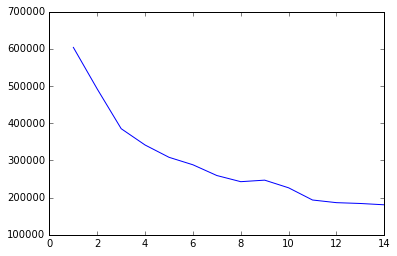

In [279]:
# trial_0 modeling
inertia_list_0 = []
maxk = 15
for k in range(1,maxk):
    km_0 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(trial_0,with_mean=False)
    km_0.fit(trial_0)
    inertia_list_0.append(km_0.inertia_)

plt.plot(range(1,maxk),inertia_list_0)

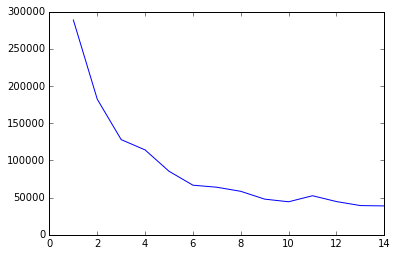

In [280]:
# trial_1 modeling
# total[0], child[1], employ[4], hs[6], l_h[7], inc_percap[13],  price[14], w_use_percap[15], y[17]
inertia_list_1 = []
maxk = 15
for k in range(1,maxk):
    km_1 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(trial_1,with_mean=False)
    km_1.fit(trial_1)
    inertia_list_1.append(km_1.inertia_)

plt.plot(range(1,maxk),inertia_list_1)

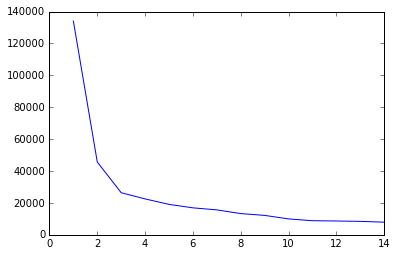

In [281]:
# trial_2 modeling
# total[0], child[1], employ[4], inc_percap[13],  price[14], w_use_percap[15]

inertia_list_2 = []
maxk = 15
for k in range(1,maxk):
    km_2 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(trial_2,with_mean=False)
    km_2.fit(trial_2)
    inertia_list_2.append(km_2.inertia_)

plt.plot(range(1,maxk),inertia_list_2)

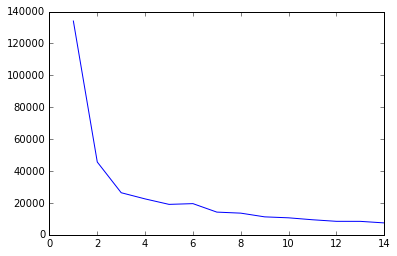

In [314]:
# trial_3 modeling
# total[0], child[1], employ[4], price[14], w_use_percap[15]

inertia_list_2 = []
maxk = 15
for k in range(1,maxk):
    km_2 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    scale(trial_2,with_mean=False)
    km_2.fit(trial_2)
    inertia_list_2.append(km_2.inertia_)

plt.plot(range(1,maxk),inertia_list_2)

In [282]:
# using 3 clusters for 6 features (selected trial_2 model)
nk = 3
km = cluster.KMeans(n_clusters=nk, init='k-means++', max_iter=100, n_init=10)
scale(trial_2,with_mean=False)
clusters = km.fit_predict(trial_2)

# total[0], child[1], employ[4], inc_percap[13],  price[14], w_use_percap[15]


clusters_dict = {}
for i in range(nk):
    clusters_dict[i] = []
    
for idx, a_cluster in enumerate(clusters):
    clusters_dict[a_cluster].append(trial_2[idx])

In [283]:
# convert clusters np array to dataframe
df_clusters = pd.DataFrame(clusters, columns=['cluster'])

# format as string, create new column, drop old column
df_clusters['Cluster'] = ('Cluster ' + df_clusters['cluster'].astype('str'))
df_clusters = df_clusters.drop('cluster', axis=1)

df_clusters.head(3)

,Cluster
0,Cluster 1
1,Cluster 2
2,Cluster 0


In [284]:
# recover rand_sample, which aligns with trial_2, and convert to dataframe
df_rand_sample = pd.DataFrame(rand_sample, columns=gdf_hist_list)
df_rand_sample.head(3)

,total,child,adult,cit,employ,hi,hs,l_h,a,b,na,o,w,inc_percap,price,w_use_percap,x,y
0,2.0,0.00,1.00,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,19900.0,0.002311,4326.819067,-81.602248,27.821369
1,4.0,0.25,0.75,1.0,1.0,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,24075.0,0.005150,43203.883495,-99.890119,32.301456
2,1.0,0.00,1.00,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,84000.0,0.008965,133858.853276,-117.017231,32.567479


In [304]:
# select subset of columns based on results of trial_2 kmeans clustering
features = ['total', 'child', 'employ', 'inc_percap', 'price', 'w_use_percap']
df_features = df_rand_sample[features]

# format columns
df_features['Water Usage'] = (df_features['w_use_percap']/1000).astype('int')
df_features['Income'] = (df_features['inc_percap']/1000).astype('int')
df_features['Price'] = (df_features['price']*100).round(2)
df_features['Household Size'] = df_features['total'].astype('int')
df_features['Children'] = df_features['child'].round(1)
df_features['Employ'] = df_features['employ'].round(1)

# drop columns
df_features = df_features.drop(['w_use_percap', 'inc_percap', 'price', 'total', 'child', 'employ'], axis=1)

df_features.head(3)

/Users/peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/peter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

,Water Usage,Income,Price,Household Size,Children,Employ
0,4,19,0.23,2,0.0,0.0
1,43,24,0.52,4,0.2,1.0
2,133,84,0.90,1,0.0,1.0


In [309]:
# merge features dataframe to clusters dataframe
df_final = pd.merge(df_features, df_clusters, left_index=True, right_index=True)
df_final.head(3)

,Water Usage,Income,Price,Household Size,Children,Employ,Cluster
0,4,19,0.23,2,0.0,0.0,Cluster 1
1,43,24,0.52,4,0.2,1.0,Cluster 2
2,133,84,0.90,1,0.0,1.0,Cluster 0


In [310]:
# export to csv for incorporation into d3 scatterplot matrix visualization
df_final = df_final.sample(150)
df_final.shape

(150, 7)

In [311]:
df_final.to_csv('presentation/scatter/scatter.csv', columns=['Water Usage', 'Income', 'Price', 'Household Size', 'Cluster'], index=False)